In [9]:
from pomegranate import*


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde
import json

In [11]:
from hmm_helpers import build_hmm
from helpers import WindowType

In [12]:
sns.set(color_codes=True)

In [13]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [14]:
#from IPython.core.debugger import set_trace

with open(hmm_file) as json_file:
    hmm_json_map = json.load(json_file)
    hmm_json_map = json.loads(hmm_json_map)
    #print(hmm_json_map)
    
    print("Start state: ")
    print("Distribution: ", hmm_json_map["start"]["distribution"])
    
    print("End state:")
    print("Distribution: ", hmm_json_map["end"]["distribution"])
    
    states = hmm_json_map["states"]
    
    #set_trace()
    
    for state in states:
        print("====================================================")
        print("State: ", state["name"])
        print("State weight: ", state["weight"])
        distribution = state["distribution"]
        
        if distribution is not None:
        
            print("Distribution: ", distribution["class"])
            
            if distribution["class"] == "Distribution":
                print("Distribution name: ", distribution["name"])
                
                if distribution["name"] == "IndependentComponentsDistribution":
                    distributions = distribution["parameters"][0]
                    for dist in distributions:
                        
                        if dist["class"] == "GeneralMixtureModel":
                            gmm_distributions = dist["distributions"]
                
                            for gmm_dist in gmm_distributions:
                                print("Distribution name: ", gmm_dist["name"])
                                print("Distribution params: ", gmm_dist["parameters"])
                            print("Weights: ", dist["weights"])
                        else:
                        
                        #print(dist)
                            print("Distribution name: ", dist["name"])
                            print("Distribution params: ", dist["parameters"])
                            print("Weights: ", distribution["parameters"][1])
            elif distribution["class"] == "GeneralMixtureModel":
                distributions = distribution["distributions"]
                
                for dist in distributions:
                    print("Distribution name: ", dist["name"])
                    print("Distribution params: ", dist["parameters"])
                print("Weights: ", distribution["weights"])
             

Start state: 
Distribution:  None
End state:
Distribution:  None
State:  GAP_STATE
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  UniformDistribution
Distribution params:  [-999.5, -998.5]
Weights:  [1.0, 1.0]
Distribution name:  UniformDistribution
Distribution params:  [-999.5, -998.5]
Weights:  [1.0, 1.0]
State:  OTHER_0
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  NormalDistribution
Distribution params:  [17.954104435483874, 2.775094202916537]
Weights:  [1.0, 1.0]
Distribution name:  NormalDistribution
Distribution params:  [15.704527419354838, 3.981706285755188]
Weights:  [1.0, 1.0]
State:  OTHER_1
State weight:  1.0
Distribution:  Distribution
Distribution name:  IndependentComponentsDistribution
Distribution name:  NormalDistribution
Distribution params:  [10.318236656596174, 3.5486932721729354]
Weights:  [1.0, 1.0]
Distribution na

In [15]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
#hmm.freeze()

Working with state:  GAP_STATE
Working with state:  OTHER_0
Working with state:  OTHER_1
Working with state:  OTHER_2
Working with state:  TUF
Working with state:  HMM_Model-start
Working with state:  HMM_Model-end
Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


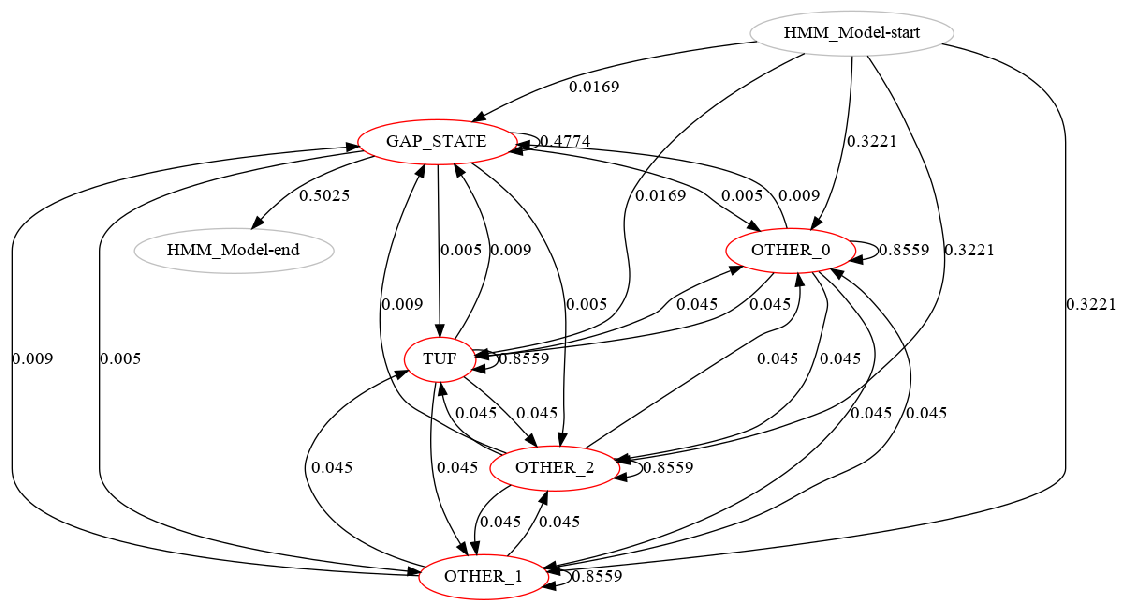

In [16]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [17]:
# load a sequence other than that we trained the HMM
from train import make_window_regions
from helpers import read_configuration_file

In [18]:
configuration=read_configuration_file("config.json")


In [19]:
configuration["regions"]["start"]=[2000000]
configuration["regions"]["end"]=[3000000]

In [20]:
regions = make_window_regions(configuration=configuration)

INFO: Window size: 100
INFO: Chromosome:  chr1
INFO: Regions used {'start': [2000000], 'end': [3000000]}
INFO: Start index: 2000000
INFO: End index:   3000000
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 892294
INFO: Extracting common bases


INFO: Estimated number of windows: 8922 
INFO: Start Window: Start/End idx (2000000, 2000099)
INFO: End Window: Start/End idx (2999900, 2999999)
INFO: Number of WGA windows: 10000
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 954674
INFO: Extracting common bases


INFO: Estimated number of windows: 9546 
INFO: Start Window: Start/End idx (2000000, 2000099)
INFO: End Window: Start/End idx (2999900, 2999999)
INFO: Number of non-wga windows: 10000
INFO: Marking N  windows with: -999
INFO: Marked as N 436 Windows
INFO: Number of mixed windows: 10000
INFO: Number of N windows: 436
INFO: Number of windows after outlier removal: 9314
INFO: Number of N windows after outlier removal 436


In [21]:
print("Number or regions: {0}".format(len(regions)))

Number or regions: 1


In [32]:
# create a sequence from region 0
sequence = regions[0].get_sequence(size=50, window_type=WindowType.BOTH)


In [33]:
print(sequence)

[(9.43, 13.97), (10.04, 17.67), (5.79, 20.48), (6.51, 14.78), (3.56, 12.71), (3.8, 10.36), (6.08, 18.61), (4.2, 14.47), (8.21, 16.02), (4.88, 16.04), (4.5, 11.32), (7.84, 11.99), (6.01, 16.64), (5.92, 12.69), (7.27, 12.84), (9.63, 20.04), (13.57, 23.64), (6.03, 19.3), (9.42, 22.03), (10.33, 18.97), (7.69, 11.76), (5.68, 20.36), (7.86, 23.11), (12.01, 19.74), (11.35, 20.24), (10.25, 18.27), (12.27, 20.8), (13.81, 28.06), (10.6, 21.5), (11.77, 21.9), (9.88, 18.51), (6.57, 18.49), (8.46, 21.79), (6.01, 18.84), (5.65, 21.11), (7.73, 15.61), (6.51, 15.18), (5.74, 16.61), (7.18, 10.48), (5.69, 15.53), (4.81, 13.09), (7.27, 19.48), (11.82, 17.84), (5.74, 13.27), (8.13, 12.76), (10.51, 13.56), (8.58, 12.53), (10.07, 17.9), (10.5, 10.61), (9.7, 11.99)]


Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [34]:
viterbi_path=hmm.viterbi(sequence)

In [35]:
print("Log-probability of ML Viterbi path: ", viterbi_path[0])

if viterbi_path[1] is not None:
    print("Viterbi path length: ", len(viterbi_path[1]))

    for item in range(len(sequence)):
        print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))


Log-probability of ML Viterbi path:  -inf


In [26]:
n_seqs=None

In [27]:

sequences = regions[0].get_region_as_sequences(size=20, window_type=WindowType.NO_WGA, n_seqs=n_seqs)

# make sure we have as many sequences we requested
#assert len(sequences) == n_seqs, "Invalid number of sequences"

In [28]:
print("Number of sequences: ", len(sequences))

Number of sequences:  465


In [29]:
for i, seq in enumerate(sequences):
    
    if -999 in seq:
        print("Sequence index: ", i)

Sequence index:  326
Sequence index:  327
Sequence index:  328
Sequence index:  329
Sequence index:  330
Sequence index:  331
Sequence index:  332
Sequence index:  333
Sequence index:  334
Sequence index:  335
Sequence index:  336
Sequence index:  337
Sequence index:  338
Sequence index:  339
Sequence index:  340
Sequence index:  341
Sequence index:  342
Sequence index:  343
Sequence index:  344
Sequence index:  345
Sequence index:  346
Sequence index:  347
Sequence index:  348


In [30]:
for seq in sequences:
    
    #print(seq)
    
    viterbi_path=hmm.viterbi(sequence)
    
    print("Log-probability of ML Viterbi path: ", viterbi_path[0])

    if viterbi_path[1] is not None:
        print("Viterbi path length: ", len(viterbi_path[1]))

        for item in range(len(sequence)):
            print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))

Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path

In [31]:
p_d_given_m = hmm.log_probability(sequence=sequences[150])
print("P(D|M): ", p_d_given_m)

print(sequences[0])
print(hmm.predict_proba(sequences[0]))

P(D|M):  -inf
[13.97, 17.67, 20.48, 14.78, 12.71, 10.36, 18.61, 14.47, 16.02, 16.04, 11.32, 11.99, 16.64, 12.69, 12.84, 20.04, 23.64, 19.3, 22.03, 18.97]
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
